# Notebook

In [ ]:
Business Understanding
Pada tahap ini membutuhkan pengetahuan dari objek bisnis, bagaimana membangun atau mendapatkan data,
dan bagaimana untuk mencocokan tujuan pemodelan untuk tujuan bisnis sehingga model terbaik dapat dibangun.
Banyaknya penduduk di India menyebabkan banyaknya pengguna sepeda motor.
Namun, karena sulitnya ekonomi membuat masyarakat India lebih memilih membeli motor bekas.
Dari dataset berikut ini berisi sekitar 32000 motor bekas yang ada di India yang diambil dari www.droom.in')
Tujuan dari analisis ini untuk mengetahui estimasi harga motor bekas yang ada di India.')
https://www.kaggle.com/datasets/saisaathvik/used-bikes-prices-in-india')

In [ ]:
Data Understanding
Tahap ini memberikan fondasi analitik untuk sebuah penelitian dengan membuat ringkasaan (summary) dan mengidentifikasi potensi masalah dalam data.
Dari data yang telah diambil mengenai harga motor bekas di India, terdapat 8 kolom yang berisi 4 kolom objek dan 4 kolom float.
Jika menggunakan regresi linear, maka hanya kolom yang berisi float saja yang bisa diolah.
1. bike_name (nama motor) = objek
2. price (harga) = float
3. city (nama kota) = objek
4. kms_driven (jumlah km yang telah ditempuh) = float
5. owner (pemilik, apakah pemilik motor tersebut merupakan pemilik pertama, kedua, atau ketiga) = objek
6. age (umur motor) = float
7. power (tenaga motor/cc) = float
8. brand (nama pabrikan motor) = objek

In [ ]:
Data Preparation
Tahap ini jelas membutuhkan pemikiran yang cukup matang dan usaha
yang cukup tinggi untuk memastikan data tepat untuk algoritma yang digunakan.
Data yang digunakan yaitu kms_driven, age, dan power sebagai fitur, sedangkan untuk price sebagai target

In [ ]:
Modeling
Pada tahap ini dilakukan metode statistika dan Machine Learning untuk penentuan terhadap teknik data mining,
alat bantu data mining, dan algoritma data mining yang akan diterapkan. Lalu selanjutnya adalah melakukan penerapan teknik dan algoritma
data mining tersebut kepada data dengan bantuan alat bantu.
Model yang digunakan yaitu regresi linier.

In [ ]:
Evaluation
Melakukan interpretasi terhadap hasil dari data mining yang dihasilkan dalam proses pemodelan pada tahap sebelumnya.
Evaluasi dilakukan terhadap model yang diterapkan pada tahap sebelumnya dengan tujuan agar model yang ditentukan dapat sesuai
dengan tujuan yang ingin dicapai dalam tahap pertama.

In [ ]:
Deployment
Perencanaan untuk Deployment dimulai selama Business Understanding dan harus menggabungkan
tidak hanya bagaimana untuk menghasilkan nilai model, tetapi juga bagaimana mengkonversi skor keputusan,
dan bagaimana untuk menggabungkan keputusan dalam sistem operasional.

# Library yang akan digunakan

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil dataset

In [18]:
df = pd.read_csv('Used_Bikes.csv')

# Deskripsi dataset

In [19]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


<AxesSubplot:>

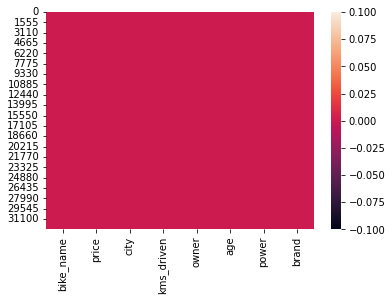

In [25]:
sns.heatmap(df.isnull())

In [26]:
df.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


# visualisasi data

<AxesSubplot:>

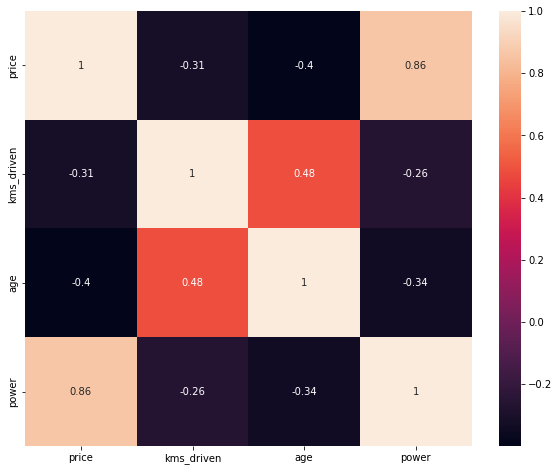

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

# Jumlah motor berdasarkan brand

In [30]:
brands = df.groupby('brand').count()[['power']].sort_values(by='power', ascending=True).reset_index()
brands = brands.rename(columns={'power':'Jumlah Motor'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Yezdi'),
  Text(1, 0, 'Rajdoot'),
  Text(2, 0, 'LML'),
  Text(3, 0, 'Ideal'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'MV'),
  Text(6, 0, 'Jawa'),
  Text(7, 0, 'BMW'),
  Text(8, 0, 'Ducati'),
  Text(9, 0, 'Triumph'),
  Text(10, 0, 'Mahindra'),
  Text(11, 0, 'Benelli'),
  Text(12, 0, 'Hyosung'),
  Text(13, 0, 'Kawasaki'),
  Text(14, 0, 'Harley-Davidson'),
  Text(15, 0, 'KTM'),
  Text(16, 0, 'TVS'),
  Text(17, 0, 'Suzuki'),
  Text(18, 0, 'Honda'),
  Text(19, 0, 'Yamaha'),
  Text(20, 0, 'Royal Enfield'),
  Text(21, 0, 'Hero'),
  Text(22, 0, 'Bajaj')])

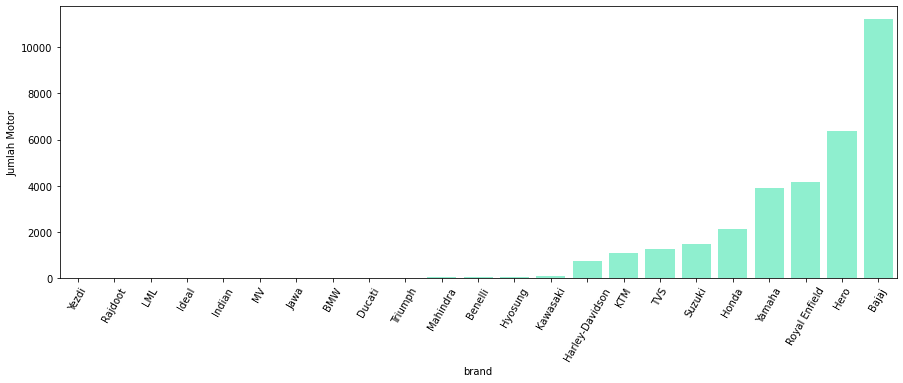

In [34]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=brands['brand'], y=brands['Jumlah Motor'], color='aquamarine')
plt.xticks(rotation=60)

# Seleksi fitur

In [35]:
fitur = ['kms_driven', 'age', 'power']
x = df[fitur]
y = df['price']
x.shape, y.shape

((32648, 3), (32648,))

# split data training dan testing

In [38]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(8162,)

# membuat regresi linier

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
predik = lr.predict(X_test)

In [40]:
nilai = lr.score(X_test, y_test)
print('Akurasi Model Regresi Linier : ', nilai)

Akurasi Model Regresi Linier :  0.7659800567831424


# membuat inputan regresi linier

Evaluation

Sebelum tahap deployment, harus melakukan tahap evaluasi. Pada tahap ini, kita melakukukan pengujian data sebelum di deploy ke streamlit

In [41]:
#kms_driven = 17654.0, age = 3.0, power = 110.0
inputan = np.array([[17654.0,3.0,110.0]])
prediksi = lr.predict(inputan)
print('Estimasi Harga Motor : ', prediksi)

Estimasi Harga Motor :  [23762.0424904]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# Save model

merubah file jupyter menjadi sav agar bisa diolah ke streamlit

In [42]:
import pickle
filename = 'estimasi_motor.sav'
pickle.dump(lr,open(filename,'wb'))